In [4]:
import sweetviz
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Data Reading

In [5]:
Data = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","ZeroFilledShipments.csv"))
Data = Data.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Sales" : "Shipment"})


In [6]:
Data1 = Data[['SKU','Time','Date','Shipment']]
Data1

,SKU,Time,Date,Shipment
0,100000017,NaN,2019-01-07,0
1,100000019,W01-19,2019-01-07,804
2,100000020,W01-19,2019-01-07,60
3,100000030,NaN,2019-01-07,0
4,100000046,W01-19,2019-01-07,336
...,...,...,...,...
98422,100187436,NaN,2020-10-05,0
98423,100187440,W40-20,2020-10-05,0
98424,100187846,W40-20,2020-10-05,0
98425,100187922,W40-20,2020-10-05,96


## Glance View

In [7]:
GlanceView = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","GlanceView.csv"))
GlanceView = GlanceView.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Glance View PW" : "GlanceView"})
GlanceView

,Version.[Version Name],Time,SKU,GlanceView
0,CurrentWorkingView,W01-20,100160486,0
1,CurrentWorkingView,W02-20,100160486,0
2,CurrentWorkingView,W03-20,100160486,0
3,CurrentWorkingView,W04-20,100160486,0
4,CurrentWorkingView,W05-20,100160486,0
...,...,...,...,...
34338,CurrentWorkingView,W36-20,100186806,181
34339,CurrentWorkingView,W37-20,100186806,273
34340,CurrentWorkingView,W38-20,100186806,349
34341,CurrentWorkingView,W39-20,100186806,321


## Lag Function

In [8]:
def create_lag_variables(df, date_column, grouped_on, shifting_var
                         , month_ascending=True, lag_vars_range = list()):
    """
    Function to create lag-variables    
    Parameters
    ----------
    df : pandas dataframe
        DESCRIPTION. Containing column names like month, banner_id, sku_id and actual_quantity.
    lag_vars_range : list, not optional
        DESCRIPTION. Pass a set of integers which will then generate the individual
        lag variables.

    Returns
    -------
    df : updated pandas dataframe with lag variables
        The passed dataframe is updated with the set of lag-variables 
        as passed to lag_vars_range

    """
    for lag in lag_vars_range:
        df['lag_'+str(lag)] = (df
                               .sort_values(by = date_column, ascending = month_ascending)
                               .groupby(grouped_on)[shifting_var].shift(lag)
                               .fillna(0))
    return df

In [9]:
Data1 = pd.merge(Data1, GlanceView[['SKU','Time','GlanceView']], how='left', on=['SKU','Time'])
Data1

,SKU,Time,Date,Shipment,GlanceView
0,100000017,NaN,2019-01-07,0,NaN
1,100000019,W01-19,2019-01-07,804,NaN
2,100000020,W01-19,2019-01-07,60,NaN
3,100000030,NaN,2019-01-07,0,NaN
4,100000046,W01-19,2019-01-07,336,NaN
...,...,...,...,...,...
98422,100187436,NaN,2020-10-05,0,NaN
98423,100187440,W40-20,2020-10-05,0,NaN
98424,100187846,W40-20,2020-10-05,0,0.0
98425,100187922,W40-20,2020-10-05,96,NaN


In [10]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="GlanceView",month_ascending=True,lag_vars_range=[1,2,3,4])

In [11]:
Data1 = Data1.rename(columns={"lag_1": "GlanceView_Lag1","lag_2" : "GlanceView_Lag2", "lag_3" :"GlanceView_Lag3","lag_4" :"GlanceView_Lag4"})
Data1

,SKU,Time,Date,Shipment,GlanceView,GlanceView_Lag1,GlanceView_Lag2,GlanceView_Lag3,GlanceView_Lag4
0,100000017,NaN,2019-01-07,0,NaN,0.0,0.0,0.0,0.0
1,100000019,W01-19,2019-01-07,804,NaN,0.0,0.0,0.0,0.0
2,100000020,W01-19,2019-01-07,60,NaN,0.0,0.0,0.0,0.0
3,100000030,NaN,2019-01-07,0,NaN,0.0,0.0,0.0,0.0
4,100000046,W01-19,2019-01-07,336,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
98422,100187436,NaN,2020-10-05,0,NaN,0.0,0.0,0.0,2.0
98423,100187440,W40-20,2020-10-05,0,NaN,0.0,0.0,0.0,0.0
98424,100187846,W40-20,2020-10-05,0,0.0,0.0,0.0,0.0,0.0
98425,100187922,W40-20,2020-10-05,96,NaN,0.0,0.0,0.0,0.0


In [12]:
pearson = Data1.corr(method='pearson')
pearson

,SKU,Shipment,GlanceView,GlanceView_Lag1,GlanceView_Lag2,GlanceView_Lag3,GlanceView_Lag4
SKU,1.000000,-0.102507,-0.205146,-0.086087,-0.084614,-0.082839,-0.081321
Shipment,-0.102507,1.000000,0.536524,0.519774,0.521981,0.494118,0.482801
GlanceView,-0.205146,0.536524,1.000000,0.886950,0.812583,0.771224,0.734157
GlanceView_Lag1,-0.086087,0.519774,0.886950,1.000000,0.889401,0.820017,0.779838
GlanceView_Lag2,-0.084614,0.521981,0.812583,0.889401,1.000000,0.887726,0.817789
GlanceView_Lag3,-0.082839,0.494118,0.771224,0.820017,0.887726,1.000000,0.885741
GlanceView_Lag4,-0.081321,0.482801,0.734157,0.779838,0.817789,0.885741,1.000000


<AxesSubplot:>

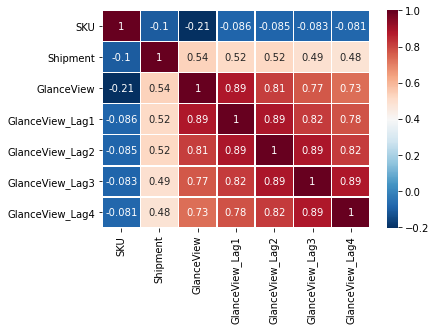

In [13]:
import seaborn as sb
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

## Out of Stock

In [14]:
OOS = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","OutOfStockData.csv"))
OOS = OOS.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Rep OOS PW" : "OOS","Rep OOS% PW" : "OOS%"})
OOS.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'OOS', 'OOS%'], dtype='object')

In [15]:
Data1 = pd.merge(Data1, OOS[['SKU','Time','OOS','OOS%']], how='left', on=['SKU','Time'])
Data1

,SKU,Time,Date,Shipment,GlanceView,GlanceView_Lag1,GlanceView_Lag2,GlanceView_Lag3,GlanceView_Lag4,OOS,OOS%
0,100000017,NaN,2019-01-07,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
1,100000019,W01-19,2019-01-07,804,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2,100000020,W01-19,2019-01-07,60,NaN,0.0,0.0,0.0,0.0,NaN,NaN
3,100000030,NaN,2019-01-07,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
4,100000046,W01-19,2019-01-07,336,NaN,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
98422,100187436,NaN,2020-10-05,0,NaN,0.0,0.0,0.0,2.0,NaN,NaN
98423,100187440,W40-20,2020-10-05,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
98424,100187846,W40-20,2020-10-05,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
98425,100187922,W40-20,2020-10-05,96,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [16]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="OOS",month_ascending=True,lag_vars_range=[1,2,3,4])

In [17]:
Data1 = Data1.rename(columns={"lag_1": "OOS_Lag1","lag_2" : "OOS_Lag2", "lag_3" :"OOS_Lag3","lag_4" :"OOS_Lag4"})
Data1

,SKU,Time,Date,Shipment,GlanceView,GlanceView_Lag1,GlanceView_Lag2,GlanceView_Lag3,GlanceView_Lag4,OOS,OOS%,OOS_Lag1,OOS_Lag2,OOS_Lag3,OOS_Lag4
0,100000017,NaN,2019-01-07,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1,100000019,W01-19,2019-01-07,804,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2,100000020,W01-19,2019-01-07,60,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
3,100000030,NaN,2019-01-07,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
4,100000046,W01-19,2019-01-07,336,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98422,100187436,NaN,2020-10-05,0,NaN,0.0,0.0,0.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0
98423,100187440,W40-20,2020-10-05,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
98424,100187846,W40-20,2020-10-05,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
98425,100187922,W40-20,2020-10-05,96,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [18]:
pearson = Data1.corr(method='pearson')
pearson

,SKU,Shipment,GlanceView,GlanceView_Lag1,GlanceView_Lag2,GlanceView_Lag3,GlanceView_Lag4,OOS,OOS%,OOS_Lag1,OOS_Lag2,OOS_Lag3,OOS_Lag4
SKU,1.000000,-0.102507,-0.205146,-0.086087,-0.084614,-0.082839,-0.081321,-0.161294,-0.034290,-0.071586,-0.071088,-0.068924,-0.067188
Shipment,-0.102507,1.000000,0.536524,0.519774,0.521981,0.494118,0.482801,0.374227,-0.012284,0.387963,0.368675,0.359409,0.354162
GlanceView,-0.205146,0.536524,1.000000,0.886950,0.812583,0.771224,0.734157,0.581460,-0.061084,0.533828,0.509377,0.488769,0.470423
GlanceView_Lag1,-0.086087,0.519774,0.886950,1.000000,0.889401,0.820017,0.779838,0.551477,-0.019491,0.596692,0.551220,0.525888,0.503618
GlanceView_Lag2,-0.084614,0.521981,0.812583,0.889401,1.000000,0.887726,0.817789,0.534323,0.002657,0.564263,0.596550,0.547139,0.521786
GlanceView_Lag3,-0.082839,0.494118,0.771224,0.820017,0.887726,1.000000,0.885741,0.514572,0.011978,0.544399,0.563754,0.593999,0.543494
GlanceView_Lag4,-0.081321,0.482801,0.734157,0.779838,0.817789,0.885741,1.000000,0.516719,0.017014,0.524983,0.544113,0.561499,0.592308
OOS,-0.161294,0.374227,0.581460,0.551477,0.534323,0.514572,0.516719,1.000000,0.176259,0.679849,0.597956,0.554019,0.556689
OOS%,-0.034290,-0.012284,-0.061084,-0.019491,0.002657,0.011978,0.017014,0.176259,1.000000,0.129897,0.113536,0.098126,0.083355
OOS_Lag1,-0.071586,0.387963,0.533828,0.596692,0.564263,0.544399,0.524983,0.679849,0.129897,1.000000,0.676736,0.601322,0.554658


<AxesSubplot:>

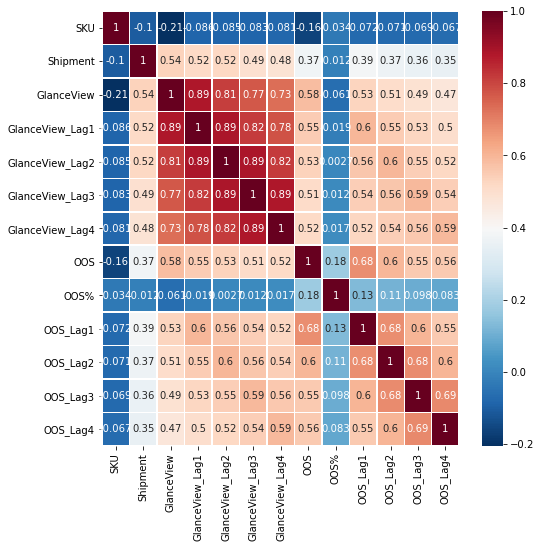

In [19]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

In [35]:
# Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="OOS%",month_ascending=True,lag_vars_range=[1,2,3,4])
# Data1.columns

In [36]:
# Data1 = Data1.rename(columns={"lag_1": "OOS%_Lag1","lag_2" : "OOS%_Lag2", "lag_3" :"OOS%_Lag3","lag_4" :"OOS%_Lag4"})
# Data1.columns

# LBB Price

In [37]:
LBB = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","LBB_Price_Data.csv"))
LBB = LBB.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","LBB Price" : "LBB_Price"})
LBB.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'LBB_Price'], dtype='object')

In [38]:
Data1 = pd.merge(Data1, LBB[['SKU','Time','LBB_Price']], how='left', on=['SKU','Time'])
Data1

,SKU,Time,Date,Shipment,GlanceView,GlanceView_Lag1,GlanceView_Lag2,GlanceView_Lag3,GlanceView_Lag4,OOS,OOS%,OOS_Lag1,OOS_Lag2,OOS_Lag3,OOS_Lag4,LBB_Price
0,100000127,W02-17,2017-01-09,402,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
1,100000130,W02-17,2017-01-09,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
2,100000148,W02-17,2017-01-09,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
3,100000282,W02-17,2017-01-09,28,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
4,100000284,W02-17,2017-01-09,4,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160038,100187436,NaN,2020-10-05,0,NaN,0.0,0.0,0.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
160039,100187440,W40-20,2020-10-05,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
160040,100187846,W40-20,2020-10-05,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
160041,100187922,W40-20,2020-10-05,96,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN


In [39]:
# import seaborn as sb
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(12,12))
# sb.heatmap(pearson, 
#             xticklabels=pearson.columns,
#             yticklabels=pearson.columns,
#             cmap='RdBu_r',
#             annot=True,linewidths=0.5, ax=ax)

In [40]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="LBB_Price",month_ascending=True,lag_vars_range=[1,2,3,4])


In [41]:
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceView_Lag1',
       'GlanceView_Lag2', 'GlanceView_Lag3', 'GlanceView_Lag4', 'OOS', 'OOS%',
       'OOS_Lag1', 'OOS_Lag2', 'OOS_Lag3', 'OOS_Lag4', 'LBB_Price', 'lag_1',
       'lag_2', 'lag_3', 'lag_4'],
      dtype='object')

In [42]:
Data1 = Data1.rename(columns={"lag_1": "LBBP_Lag1","lag_2" : "LBBP_Lag2", "lag_3" :"LBBP_Lag3","lag_4" :"LBBP_Lag4"})


In [43]:
pearson = Data1.corr(method='pearson')
pearson

,SKU,Shipment,GlanceView,GlanceView_Lag1,GlanceView_Lag2,GlanceView_Lag3,GlanceView_Lag4,OOS,OOS%,OOS_Lag1,OOS_Lag2,OOS_Lag3,OOS_Lag4,LBB_Price,LBBP_Lag1,LBBP_Lag2,LBBP_Lag3,LBBP_Lag4
SKU,1.000000,-0.077786,-0.205146,-0.039536,-0.038777,-0.037844,-0.037117,-0.161294,-0.034290,-0.040196,-0.040038,-0.038734,-0.037772,-0.075380,-0.011712,-0.012062,-0.012049,-0.012370
Shipment,-0.077786,1.000000,0.536524,0.489244,0.491289,0.465418,0.454897,0.374227,-0.012284,0.365622,0.347603,0.338905,0.333949,-0.057241,0.009650,0.006586,0.007755,0.013039
GlanceView,-0.205146,0.536524,1.000000,0.886950,0.812583,0.771224,0.734157,0.581460,-0.061084,0.533828,0.509377,0.488769,0.470423,-0.087486,-0.067029,-0.063320,-0.059910,-0.057322
GlanceView_Lag1,-0.039536,0.489244,0.886950,1.000000,0.890899,0.822413,0.782715,0.551477,-0.019491,0.599035,0.553896,0.528659,0.506447,-0.078783,0.017034,0.019145,0.021673,0.023792
GlanceView_Lag2,-0.038777,0.491289,0.812583,0.890899,1.000000,0.889202,0.820142,0.534323,0.002657,0.566900,0.598825,0.549722,0.524454,-0.074054,0.016054,0.017128,0.019138,0.021874
GlanceView_Lag3,-0.037844,0.465418,0.771224,0.822413,0.889202,1.000000,0.887195,0.514572,0.011978,0.547206,0.566318,0.596182,0.545976,-0.072037,0.018160,0.016080,0.016946,0.019138
GlanceView_Lag4,-0.037117,0.454897,0.734157,0.782715,0.820142,0.887195,1.000000,0.516719,0.017014,0.527946,0.546839,0.563958,0.594389,-0.070078,0.017766,0.018236,0.015756,0.016915
OOS,-0.161294,0.374227,0.581460,0.551477,0.534323,0.514572,0.516719,1.000000,0.176259,0.679849,0.597956,0.554019,0.556689,-0.045104,-0.034071,-0.031907,-0.030613,-0.030641
OOS%,-0.034290,-0.012284,-0.061084,-0.019491,0.002657,0.011978,0.017014,0.176259,1.000000,0.129897,0.113536,0.098126,0.083355,-0.008096,0.002732,0.012906,0.008439,0.011895
OOS_Lag1,-0.040196,0.365622,0.533828,0.599035,0.566900,0.547206,0.527946,0.679849,0.129897,1.000000,0.678129,0.602997,0.556478,-0.040042,0.012756,0.014415,0.015407,0.016073


<AxesSubplot:>

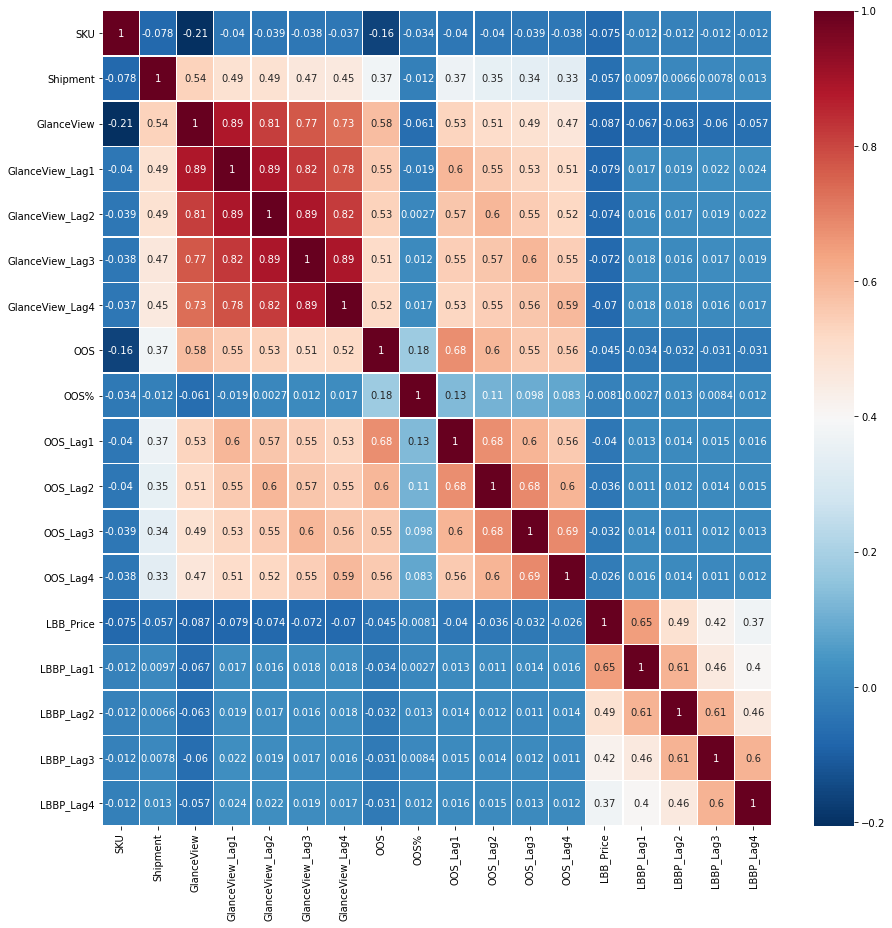

In [44]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

## For Shipments